In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tracks = pd.read_json("data/tracks.jsonl", lines=True).dropna()


# Corelation of music features

<Axes: >

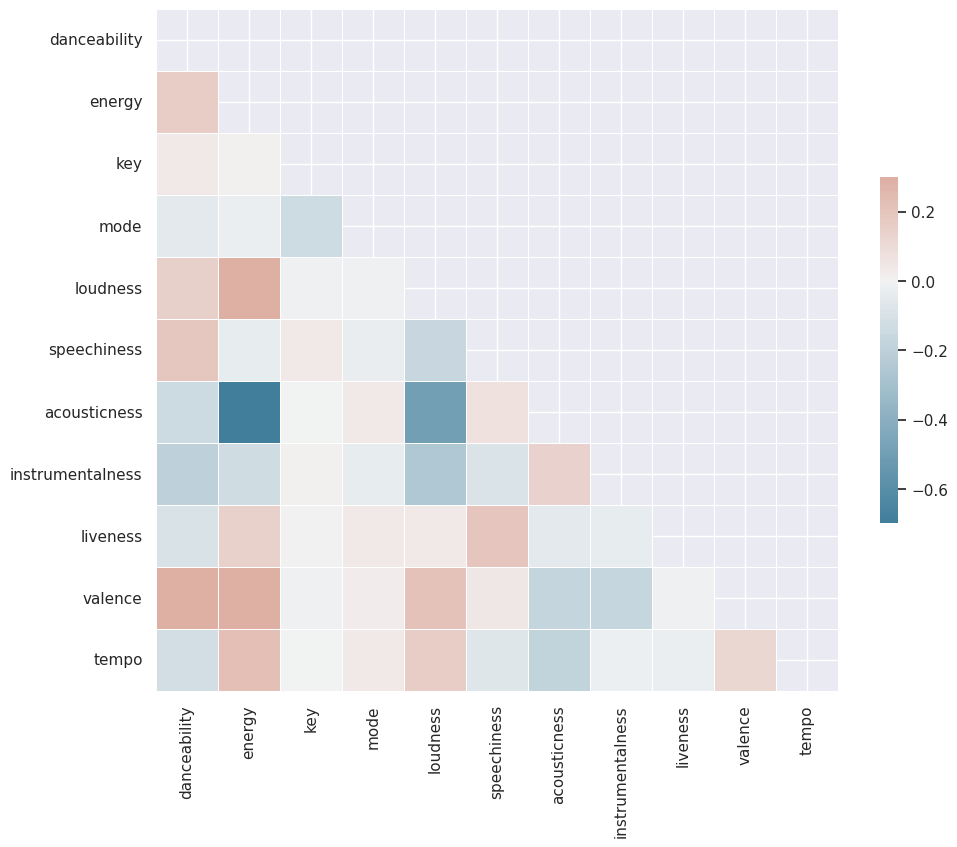

In [7]:
corr = tracks.iloc[:,7:-1].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
correlation_matrix = tracks.iloc[:,7:-1].corr()

# Set a correlation threshold (for example, 0.8)
threshold = 0.4

# Identifying pairs of highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_pairs_df

,Feature 1,Feature 2,Correlation
0,loudness,energy,0.749866
1,acousticness,energy,-0.699789
2,acousticness,loudness,-0.497376
3,valence,danceability,0.526455
